In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("prem_shots.csv")

df

,Squad,Sh_for,npxG/Sh_for,Sh_ag,npxG/Sh_ag
0,Arsenal,13.80,0.12,13.60,0.08
1,Aston Villa,12.40,0.12,11.00,0.10
2,Bournemouth,15.00,0.11,13.10,0.10
3,Brentford,11.00,0.14,18.50,0.10
4,Brighton,14.50,0.11,12.10,0.13
5,Chelsea,13.90,0.13,12.50,0.09
6,Crystal Palace,14.30,0.08,13.40,0.11
7,Everton,11.90,0.09,13.30,0.11
8,Fulham,15.50,0.09,12.30,0.10
9,Ipswich Town,9.82,0.09,15.40,0.14


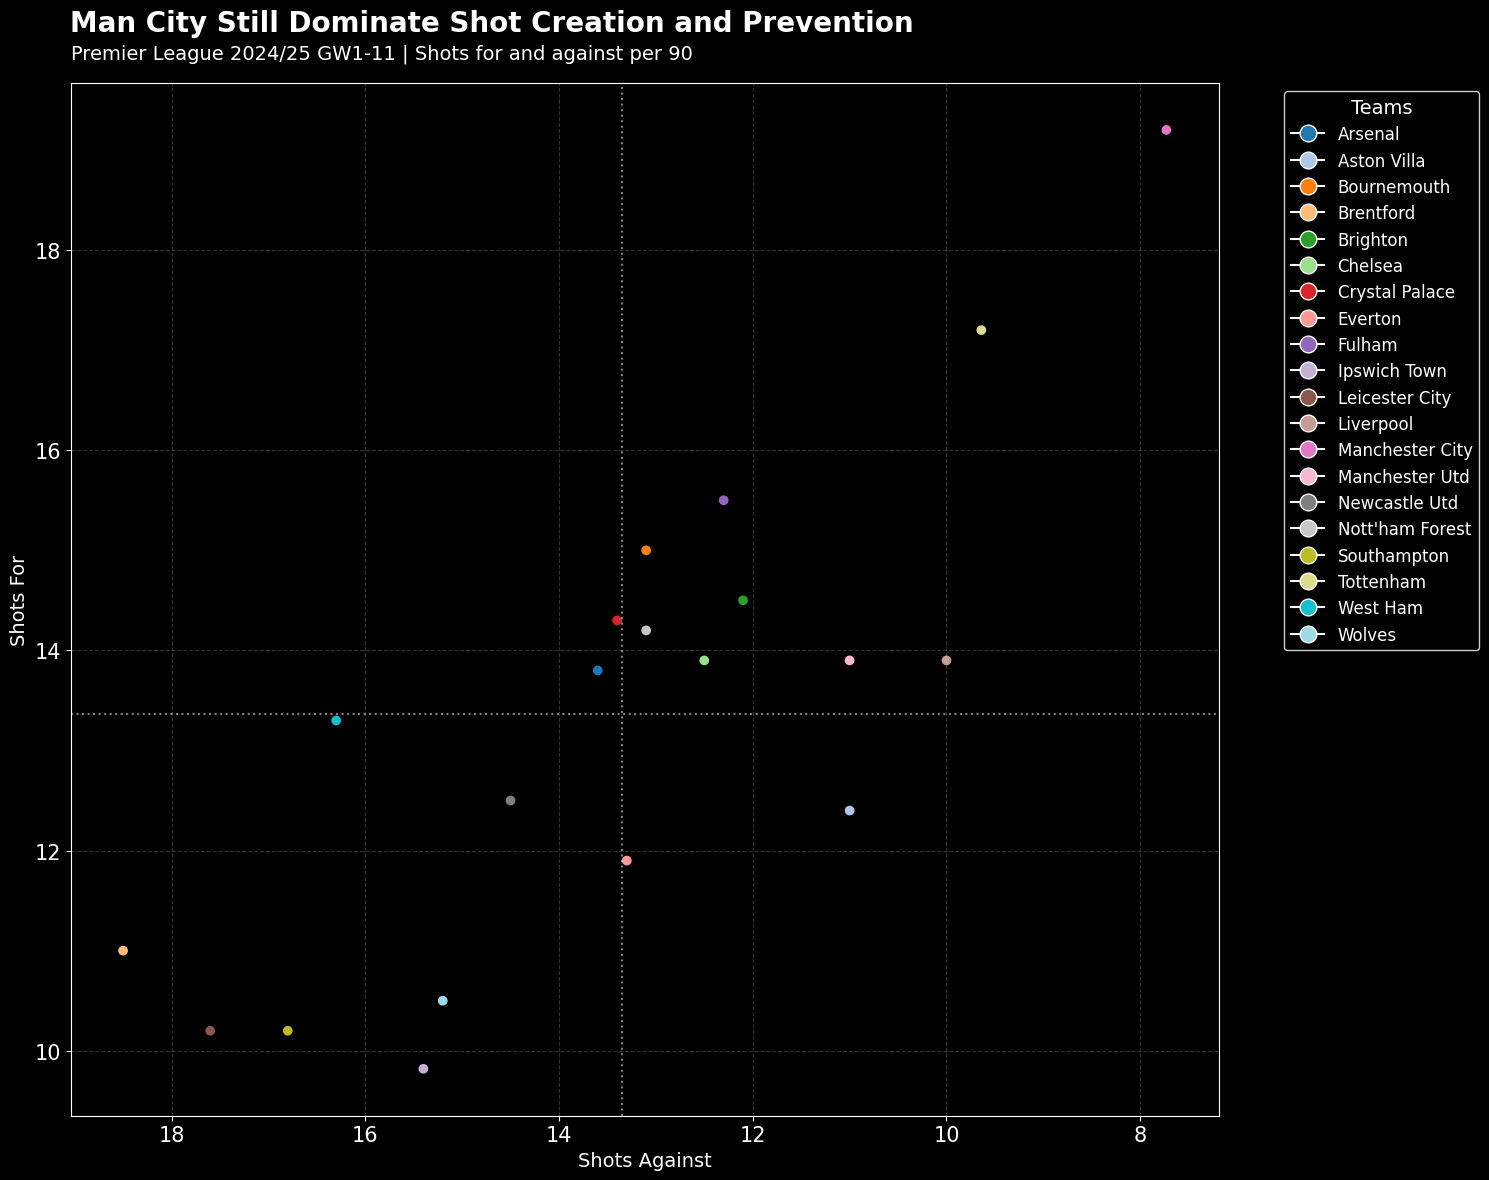

In [39]:
fig = plt.figure(figsize=(15,12))

plt.style.use('dark_background')

scatter = plt.scatter(x=df["Sh_ag"], 
                     y=df["Sh_for"],
                     c=df["Squad"].astype('category').cat.codes,
                     cmap='tab20')

unique_squads = df["Squad"].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=scatter.cmap(scatter.norm(i)), 
                             label=squad, markersize=12)  # Increased marker size
                  for i, squad in enumerate(unique_squads)]


# Calculate means
mean_shots_against = df["Sh_ag"].mean()
mean_shots_for = df["Sh_for"].mean()

# Add mean lines
plt.axvline(x=mean_shots_against, color='white', linestyle=':', alpha=0.5, label=f'League Avg: {mean_shots_against:.1f}')
plt.axhline(y=mean_shots_for, color='white', linestyle=':', alpha=0.5, label=f'League Avg: {mean_shots_for:.1f}')

plt.legend(handles=legend_elements,
          title="Teams",
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          facecolor='black', 
          edgecolor='white',
          fontsize=12,  # Added legend font size
          title_fontsize=14)  # Added legend title font size

plt.suptitle("Man City Still Dominate Shot Creation and Prevention", 
            x=0.05,
            y=0.98, 
            fontsize=20,  # Increased from 12
            fontweight='bold',
            ha='left',
            color='white') 

plt.title("Premier League 2024/25 GW1-11 | Shots for and against per 90",
         loc='left',
         pad=18,
         fontsize=14,  # Increased from 10
         fontweight='normal',
         color='white')   

plt.xlabel("Shots Against", fontsize=14)  # Added fontsize
plt.ylabel("Shots For", fontsize=14)  # Added fontsize

# Increase tick label sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid(True, linestyle='--', alpha=0.2)

plt.gca().invert_xaxis()

fig.patch.set_facecolor('black')
plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()


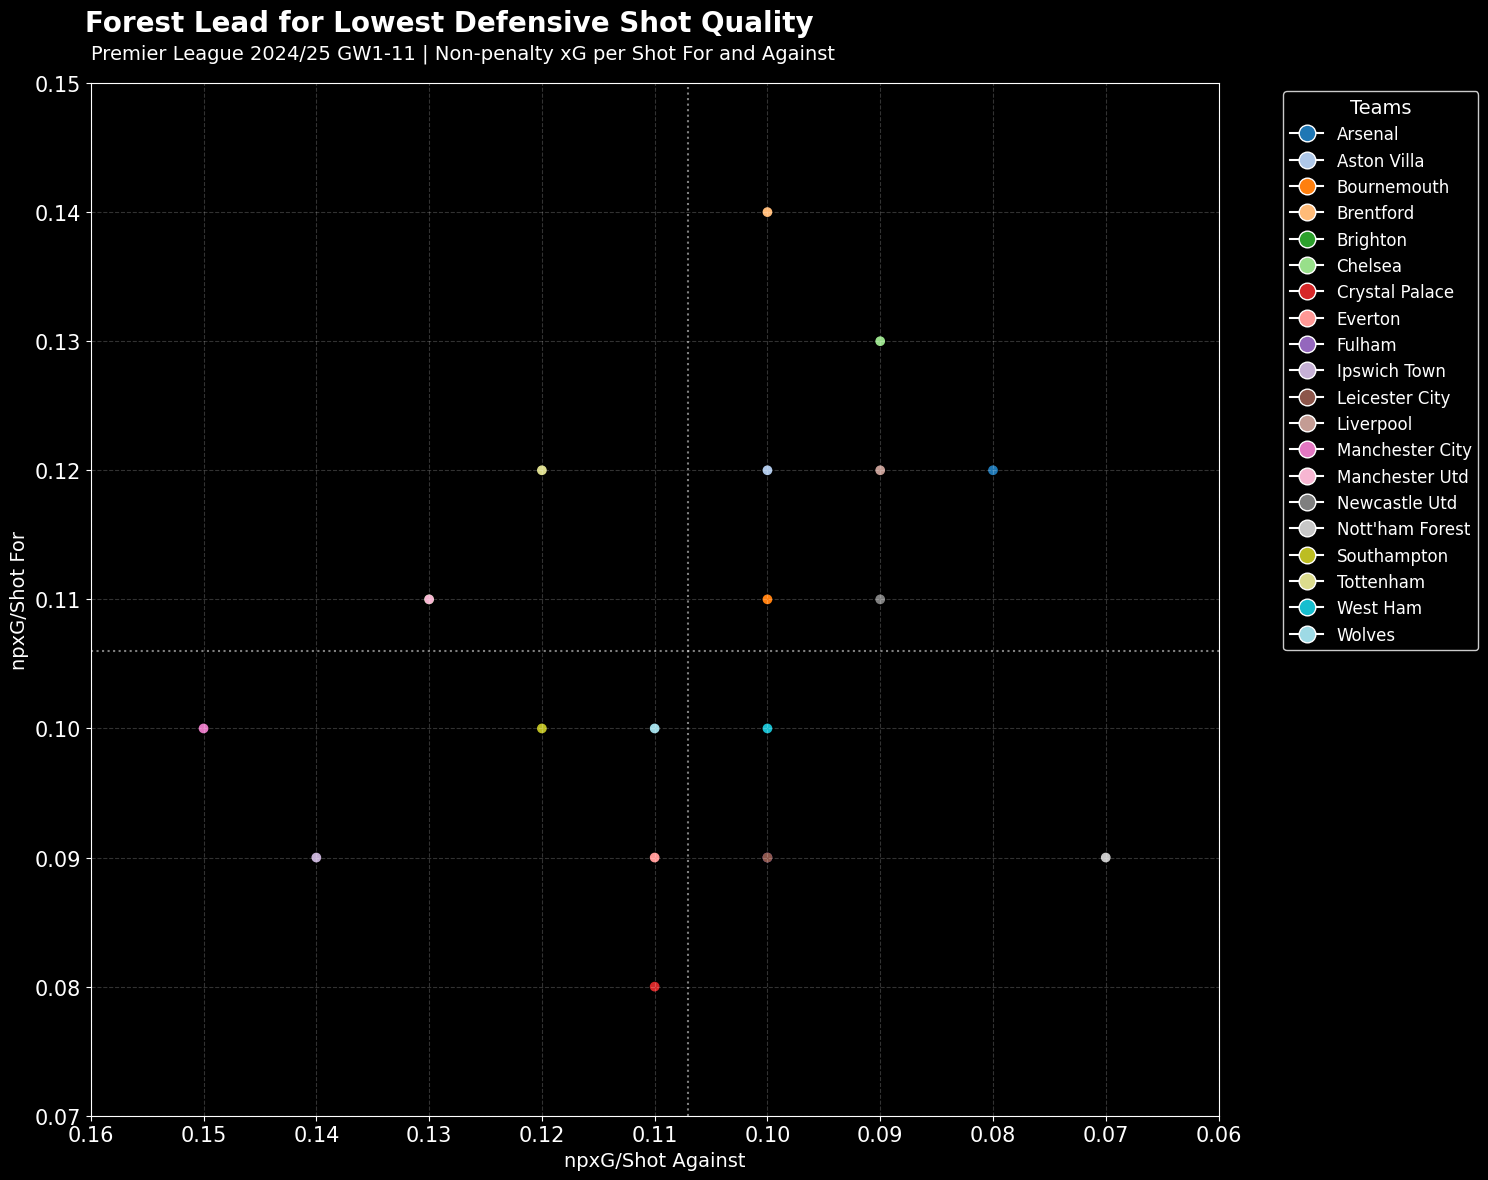

In [56]:
import numpy as np

fig = plt.figure(figsize=(15,12))
plt.style.use('dark_background')

scatter = plt.scatter(x=df["npxG/Sh_ag"], 
                     y=df["npxG/Sh_for"],
                     c=df["Squad"].astype('category').cat.codes,
                     cmap='tab20')

unique_squads = df["Squad"].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=scatter.cmap(scatter.norm(i)),
                             label=squad, markersize=12)
                  for i, squad in enumerate(unique_squads)]

# Calculate means for npxG/Sh
mean_npxg_against = df["npxG/Sh_ag"].mean()
mean_npxg_for = df["npxG/Sh_for"].mean()

# Add mean lines
plt.axvline(x=mean_npxg_against, color='white', linestyle=':', alpha=0.5,
            label=f'League Avg: {mean_npxg_against:.3f}')
plt.axhline(y=mean_npxg_for, color='white', linestyle=':', alpha=0.5,
            label=f'League Avg: {mean_npxg_for:.3f}')

plt.legend(handles=legend_elements,
          title="Teams",
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          facecolor='black', 
          edgecolor='white',
          fontsize=12,
          title_fontsize=14)

plt.suptitle("Forest Lead for Lowest Defensive Shot Quality",
            x=0.06,
            y=0.98, 
            fontsize=20,
            fontweight='bold',
            ha='left',
            color='white')

plt.title("Premier League 2024/25 GW1-11 | Non-penalty xG per Shot For and Against",
         loc='left',
         pad=18,
         fontsize=14,
         fontweight='normal',
         color='white')

plt.xlabel("npxG/Shot Against", fontsize=14)
plt.ylabel("npxG/Shot For", fontsize=14)

# Set ticks with appropriate precision
plt.xticks(np.arange(0.06, 0.17, 0.01), fontsize=15)
plt.yticks(np.arange(0.07, 0.16, 0.01), fontsize=15)

# Format tick labels to show 2 decimal places
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.grid(True, linestyle='--', alpha=0.2)

# Set axis limits AFTER setting ticks, larger value first for x-axis to invert
plt.xlim(0.16, 0.06)  # Now correctly inverted
plt.ylim(0.07, 0.15)

fig.patch.set_facecolor('black')
plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()